Instalar e importar bibliotecas necesarias

In [4]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [5]:
import json
import pandas as pd
import requests
import missingno as msno
import psycopg2
from psycopg2.extras import execute_values

Consultar API

In [6]:
response = requests.get("https://api.coincap.io/v2/assets")
print(response.text)
print(response.content)

{"data":[{"id":"bitcoin","rank":"1","symbol":"BTC","name":"Bitcoin","supply":"19656675.0000000000000000","maxSupply":"21000000.0000000000000000","marketCapUsd":"1324492918972.2400665328919775","volumeUsd24Hr":"17750181514.6428718451646353","priceUsd":"67381.3307170332757973","changePercent24Hr":"-0.9268452176093379","vwap24Hr":"66611.4568094427805858","explorer":"https://blockchain.info/"},{"id":"ethereum","rank":"2","symbol":"ETH","name":"Ethereum","supply":"120079481.7142124300000000","maxSupply":null,"marketCapUsd":"430894097367.0762529482541272","volumeUsd24Hr":"10054548373.8390680630522767","priceUsd":"3588.4073716490422224","changePercent24Hr":"-1.8645058012689715","vwap24Hr":"3560.2574593135767688","explorer":"https://etherscan.io/"},{"id":"tether","rank":"3","symbol":"USDT","name":"Tether","supply":"103414954568.1760900000000000","maxSupply":null,"marketCapUsd":"103458028801.5407739314357252","volumeUsd24Hr":"37686114470.8413672564242136","priceUsd":"1.0004165184188742","change

Pasar el JSON a DataFrame

In [7]:
data_json = json.loads(response.text)
df = pd.json_normalize(data_json['data'])
df['timestamp'] = data_json['timestamp']
df.head()

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer,timestamp
0,bitcoin,1,BTC,Bitcoin,19656675.0000000000000000,21000000.0000000000000000,1324492918972.2400665328919775,17750181514.6428718451646353,67381.3307170332757973,-0.9268452176093379,66611.4568094427805858,https://blockchain.info/,1710688588787
1,ethereum,2,ETH,Ethereum,120079481.7142124300000000,None,430894097367.0762529482541272,10054548373.8390680630522767,3588.4073716490422224,-1.8645058012689715,3560.2574593135767688,https://etherscan.io/,1710688588787
2,tether,3,USDT,Tether,103414954568.1760900000000000,None,103458028801.5407739314357252,37686114470.8413672564242136,1.0004165184188742,0.0188052552581685,1.0000944509524947,https://www.omniexplorer.info/asset/31,1710688588787
3,binance-coin,4,BNB,BNB,166801148.0000000000000000,166801148.0000000000000000,96323042504.8344361952691860,1383728981.7400852836409754,577.4722995601591195,-2.9383158307664995,577.2409922834672579,https://etherscan.io/token/0xB8c77482e45F1F44d...,1710688588787
4,solana,5,SOL,Solana,443781319.3118987000000000,None,85389860476.5740865776403461,3432216884.5814870366912902,192.4142742397868365,0.4101279233089796,186.3721982673948275,https://explorer.solana.com/,1710688588787


In [8]:
df.shape

(100, 13)

In [9]:
df.columns

Index(['id', 'rank', 'symbol', 'name', 'supply', 'maxSupply', 'marketCapUsd',
       'volumeUsd24Hr', 'priceUsd', 'changePercent24Hr', 'vwap24Hr',
       'explorer', 'timestamp'],
      dtype='object')

In [10]:
df.dtypes

id                   object
rank                 object
symbol               object
name                 object
supply               object
maxSupply            object
marketCapUsd         object
volumeUsd24Hr        object
priceUsd             object
changePercent24Hr    object
vwap24Hr             object
explorer             object
timestamp             int64
dtype: object

In [12]:
#Casteo los valores
df[['supply','rank','maxSupply','marketCapUsd','volumeUsd24Hr','priceUsd','changePercent24Hr']] = df[['supply','rank','maxSupply','marketCapUsd','volumeUsd24Hr','priceUsd','changePercent24Hr']].astype('float')
df[['id','symbol','name','explorer']] = df[['id','symbol','name','explorer']].astype('string')
df['timestamp'] = pd.to_datetime(df['timestamp'],unit = 'ms')
df.dtypes

id                   string[python]
rank                        float64
symbol               string[python]
name                 string[python]
supply                      float64
maxSupply                   float64
marketCapUsd                float64
volumeUsd24Hr               float64
priceUsd                    float64
changePercent24Hr           float64
vwap24Hr                     object
explorer             string[python]
timestamp            datetime64[ns]
dtype: object

Analizar nulos y duplicados

<Axes: >

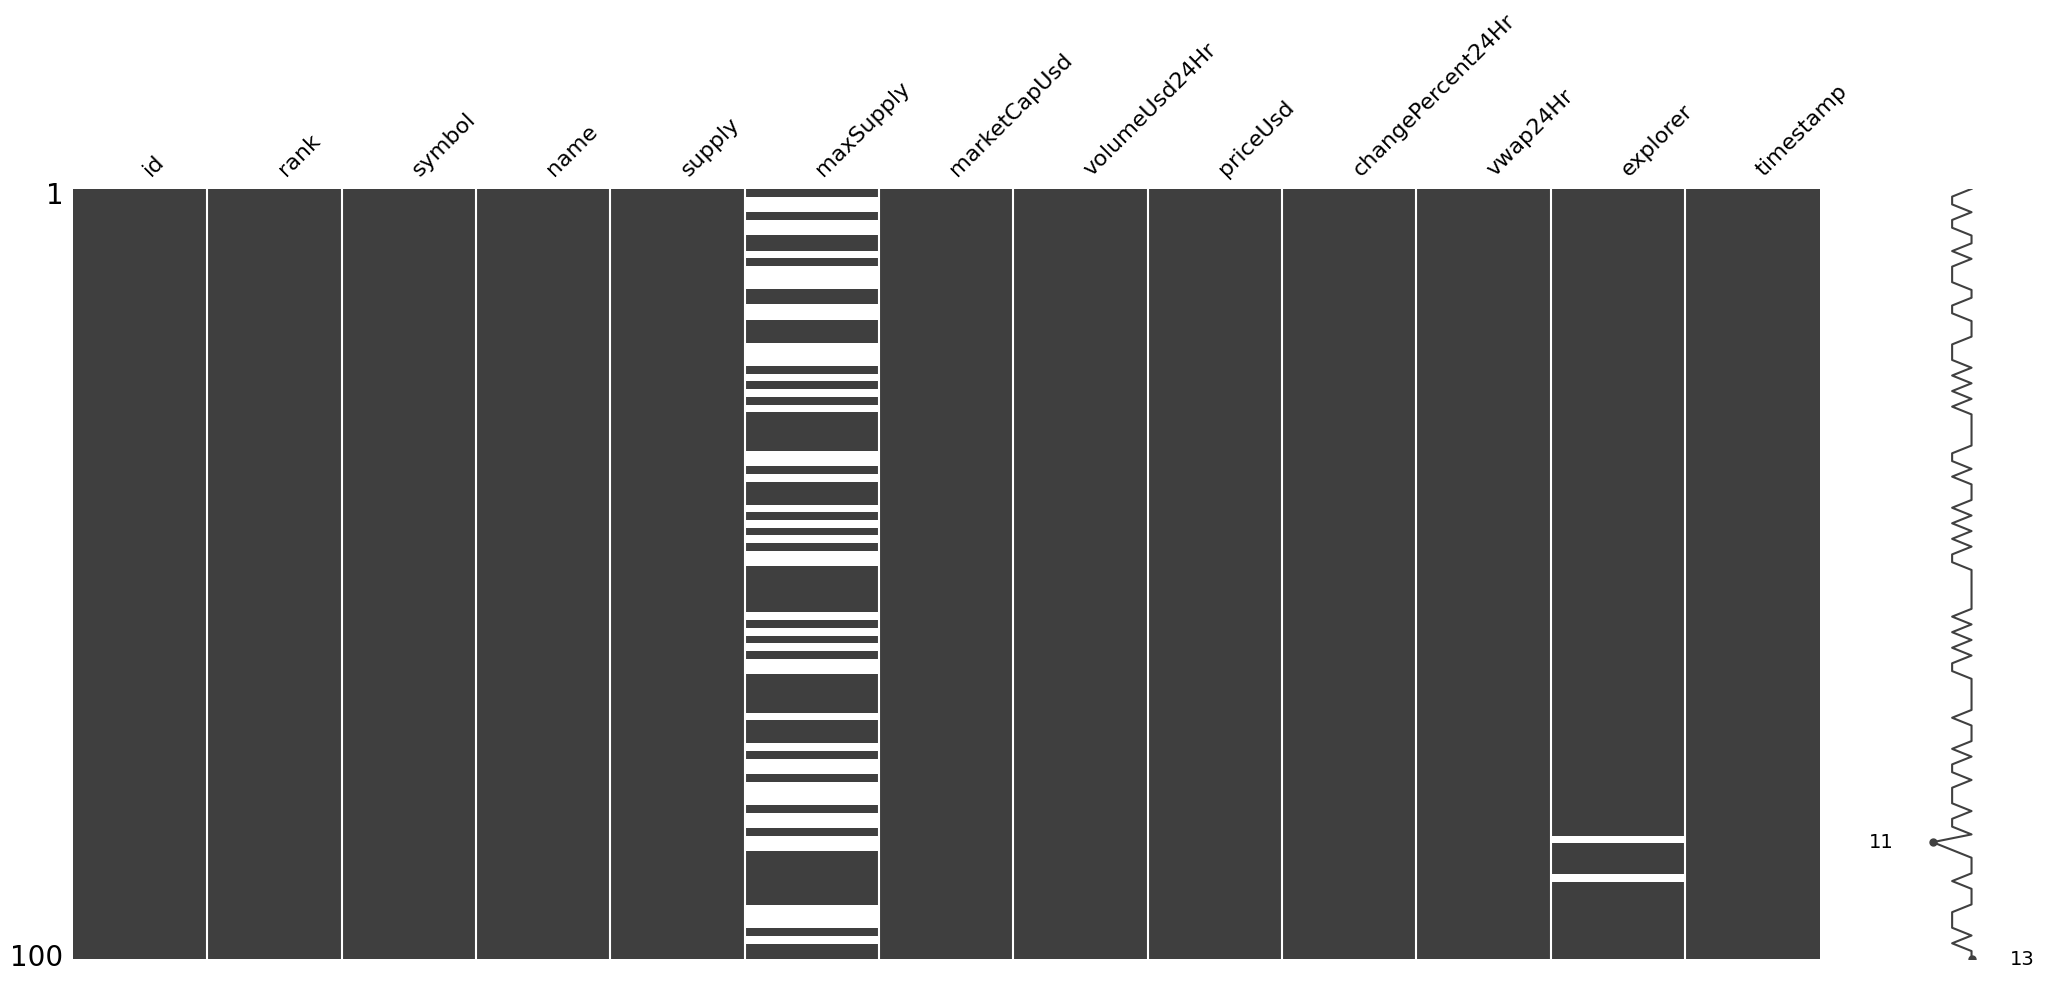

In [13]:
msno.matrix(df) 

In [14]:
#Elimino la columna MaxSupply que está practicamente vacía
#Las columnas vwap24hs y explorer tienen pocos nulos, por eso solo los remplazamos
df = df.drop(columns = ['maxSupply'])
df['vwap24Hr'] = df['vwap24Hr'].fillna(0)
df['explorer'] = df['explorer'].fillna('None')
df.head()

,id,rank,symbol,name,supply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer,timestamp
0,bitcoin,1.0,BTC,Bitcoin,1.965668e+07,1.324493e+12,1.775018e+10,67381.330717,-0.926845,66611.4568094427805858,https://blockchain.info/,2024-03-17 15:16:28.787
1,ethereum,2.0,ETH,Ethereum,1.200795e+08,4.308941e+11,1.005455e+10,3588.407372,-1.864506,3560.2574593135767688,https://etherscan.io/,2024-03-17 15:16:28.787
2,tether,3.0,USDT,Tether,1.034150e+11,1.034580e+11,3.768611e+10,1.000417,0.018805,1.0000944509524947,https://www.omniexplorer.info/asset/31,2024-03-17 15:16:28.787
3,binance-coin,4.0,BNB,BNB,1.668011e+08,9.632304e+10,1.383729e+09,577.472300,-2.938316,577.2409922834672579,https://etherscan.io/token/0xB8c77482e45F1F44d...,2024-03-17 15:16:28.787
4,solana,5.0,SOL,Solana,4.437813e+08,8.538986e+10,3.432217e+09,192.414274,0.410128,186.3721982673948275,https://explorer.solana.com/,2024-03-17 15:16:28.787


In [15]:
#Reviso Duplicados

duplicados = df['id'].duplicated()
duplicados.nunique

<bound method IndexOpsMixin.nunique of 0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: id, Length: 100, dtype: bool>

Conexion a Redshift

In [25]:
# Creo la conexión a Redsshift
url="data-engineer-cluster.cyhh5bfevlmn.us-east-1.redshift.amazonaws.com"
data_base="data-engineer-database"
user="matiluzu_coderhouse"
pwd="N9f437bgzq"
#with open("C:/Users/Usuario/Documents/pwd_redshift.txt",'r') as f:
    #pwd= f.read()
try:
    conn = psycopg2.connect(
        host='data-engineer-cluster.cyhh5bfevlmn.us-east-1.redshift.amazonaws.com',
        dbname=data_base,
        user=user,
        password=pwd,
        port='5439'
    )
    print("Conectado a Redshift con éxito!")
    
except Exception as e:
    print("No es posible conectar a Redshift")
    print(e)

Conectado a Redshift con éxito!


In [26]:
#Crear la tabla si no existe
with conn.cursor() as cur:
    cur.execute("""
        CREATE TABLE IF NOT EXISTS matiluzu_coderhouse.coincap
        (
	    id VARCHAR(50) 
	    ,rank FLOAT 
	    ,symbol VARCHAR(10)  
	    ,name VARCHAR(50)   
	    ,supply VARCHAR(100)    
	    ,marketcapusd FLOAT 
	    ,volumeUsd24Hr FLOAT   
	    ,priceusd FLOAT   
	    ,changePercent24Hr FLOAT
		,vwap24Hr FLOAT
	    ,explorer VARCHAR(100)   
	    ,timestamp datetime,
     primary key (id, timestamp)
    )""")
    conn.commit()

In [27]:
#Consulto la tabla
cur = conn.cursor()
cur.execute("SELECT * FROM matiluzu_coderhouse.coincap")
results = cur.fetchall()
results

[]

In [28]:
# Defino columnas de interes a llenar
columns = list(df.columns)
# Generar los valores a insertar
values = [tuple(x) for x in df.to_numpy()]
# Defino el INSERT
table_name='matiluzu_coderhouse.coincap'
insert_sql = f"INSERT INTO {table_name} ({', '.join(columns)}) VALUES %s"
cur.execute("BEGIN")
execute_values(cur, insert_sql, values)
cur.execute("COMMIT")

In [29]:
# Verifico que esta todo bien
cur.execute('SELECT * FROM matiluzu_coderhouse.coincap')
cur.fetchall()

[('bitcoin',
  1.0,
  'BTC',
  'Bitcoin',
  '19656675.0',
  1324492918972.24,
  17750181514.6429,
  67381.3307170333,
  -0.926845217609338,
  66611.4568094428,
  'https://blockchain.info/',
  datetime.datetime(2024, 3, 17, 15, 16, 28, 787000)),
 ('ethereum',
  2.0,
  'ETH',
  'Ethereum',
  '120079481.71421243',
  430894097367.076,
  10054548373.8391,
  3588.40737164904,
  -1.86450580126897,
  3560.25745931358,
  'https://etherscan.io/',
  datetime.datetime(2024, 3, 17, 15, 16, 28, 787000)),
 ('tether',
  3.0,
  'USDT',
  'Tether',
  '103414954568.17609',
  103458028801.541,
  37686114470.8414,
  1.00041651841887,
  0.0188052552581685,
  1.00009445095249,
  'https://www.omniexplorer.info/asset/31',
  datetime.datetime(2024, 3, 17, 15, 16, 28, 787000)),
 ('binance-coin',
  4.0,
  'BNB',
  'BNB',
  '166801148.0',
  96323042504.8344,
  1383728981.74009,
  577.472299560159,
  -2.9383158307665,
  577.240992283467,
  'https://etherscan.io/token/0xB8c77482e45F1F44dE1745F52C74426C631bDD52',
  d

In [30]:
# Cierro la conexion
cur.close()
conn.close()